<a href="https://colab.research.google.com/github/Ganesh7134/Industrial-copper-modelling/blob/main/Step_by_step_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**<u>Understanding of data</u>**

**id** --> Unique identifier for each transaction or item

**item_date** --> Date when each transaction or item was recorded

**quantity tons**	--> Quantity of the item in tons

**customer** --> Customer who purchased or ordered the items

**country**	--> Country associated with each customer

**status** --> Current status of the transaction or item (e.g., "Draft" or "Won")

**item type** -->	Category of the items being sold or produced

**application**	--> Specific use or application of the items

**thickness**	--> Thickness of the items

**width**	--> Width of the items

**material_ref** --> Reference or identifier for the material used in the items

**product_ref**	--> Reference or identifier for the specific product

**delivery date**	--> Expected or actual delivery date for each item or transaction

**selling_price**	--> Price at which the items are sold

##**Reading the dataset**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Copper_Set.csv")
df.head()

<ipython-input-2-53e48808fbd8>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Copper_Set.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
df.info() # prints information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


#**Feature Engineering** : Feature engineering is the process of transforming raw data into features that are suitable for machine learning models.

##[**Data cleaning**]: **Preprocessing data imputing null values**

In [ ]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df["item_date"].mode()[0]

20201202.0

In [ ]:
df.loc[df["item_date"]=="nan"]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104640,1BA92915-36FC-437A-811C-9DC7BF958EA6,nan,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,20210101.0,654.0


In [ ]:
df["item_date"] = df["item_date"].replace("nan",df["item_date"].mode()[0]) # replacing nan with mode date

In [ ]:
# on seeing above date having float datatype but actually we need to convert into date-time format
df["item_date"] = df["item_date"].astype("str")
it_year = []
it_month = []
it_day = []
for i in df["item_date"]:
  it_year.append(int(i[:4]))
  it_month.append(int(i[4:6]))
  it_day.append(int(i[6:8]))
dates_dict = {'year': it_year, 'month': it_month, 'day': it_day}
dates_df = pd.DataFrame(dates_dict)
dates_df

,year,month,day
0,2021,4,1
1,2021,4,1
2,2021,4,1
3,2021,4,1
4,2021,4,1
...,...,...,...
181668,2020,7,2
181669,2020,7,2
181670,2020,7,2
181671,2020,7,2


In [ ]:
dates_df["year"].unique()

array([2021, 1995, 2020, 2019])

In [ ]:
dates_df["month"].unique()

array([ 4,  0,  3,  2,  1, 12, 11, 19, 10,  9,  8,  7])

In [ ]:
dates_df["day"].unique()

array([ 1,  0, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2, 21, 20])

In [ ]:
dates_df["year"].dtype

dtype('int64')

In [ ]:
df["item_date_year"] = it_year
df["item_date_month"] = it_month
df["item_date_day"] = it_day

In [ ]:
df.drop(columns=["item_date"],inplace = True)

In [ ]:
df["delivery date"].isnull().sum()

1

In [ ]:
df["delivery date"].fillna(df["delivery date"].mode()[0],inplace = True)

In [ ]:
# apply same as item_date split into year , month , and day columns
df["delivery date"] = df["delivery date"].astype("str")
de_year = []
de_month = []
de_day = []
for i in df["delivery date"]:
  de_year.append(int(i[:4]))
  de_month.append(int(i[4:6]))
  de_day.append(int(i[6:8]))

In [ ]:


df["delivery_date_year"] = de_year
df["delivery_date_month"] = de_month
df["delivery_date_day"] = de_day

In [ ]:
df["delivery_date_year"] = df["delivery_date_year"].replace(3031,int(df["delivery_date_year"].mean()))

In [ ]:
df["delivery_date_year"].unique()

array([2021, 2020, 2022, 2019])

In [ ]:
int(df["delivery_date_month"].mean())

5

In [ ]:
df["delivery_date_month"] = df["delivery_date_month"].replace(22,int(df["delivery_date_month"].mean()))

In [ ]:
df["delivery_date_month"].unique()

array([ 7,  4,  1,  3,  6,  5,  8,  9, 10, 11,  2, 12])

In [ ]:
df["delivery_date_day"].unique()

array([ 1, 22])

In [ ]:
df.isnull().sum()

id                         2
quantity tons              0
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
df.drop(columns=["delivery date"],inplace = True)

In [ ]:
df.isnull().sum()

id                         2
quantity tons              0
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
df.drop(columns=["id"],inplace=True)

In [ ]:


df.isnull().sum()

quantity tons              0
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
int(df["customer"].mean())

30512209

In [ ]:



df["customer"].fillna(int(df["customer"].mean()),inplace=True) #customer id imputiung with mean value

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
int(df["country"].mean())

44

In [ ]:
df["country"].fillna(int(df["country"].mean()),inplace=True)

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                    0
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:

df["status"].mode()[0]

'Won'

In [ ]:
df["status"].fillna(df["status"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                    0
status                     0
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
int(df["application"].mean())

25

In [ ]:
df["application"].fillna(int(df["application"].mean()),inplace=True)

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                    0
status                     0
item type                  0
application                0
thickness                  1
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
int(df["thickness"].mean())

2

In [ ]:

df["thickness"].fillna(int(df["thickness"].mean()),inplace=True)

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                    0
status                     0
item type                  0
application                0
thickness                  0
width                      0
material_ref           77919
product_ref                0
selling_price              1
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:
df["selling_price"].mean()

1918.0355051961778

In [ ]:
df["selling_price"].fillna(df["selling_price"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

quantity tons              0
customer                   0
country                    0
status                     0
item type                  0
application                0
thickness                  0
width                      0
material_ref           77919
product_ref                0
selling_price              0
item_date_year             0
item_date_month            0
item_date_day              0
delivery_date_year         0
delivery_date_month        0
delivery_date_day          0
dtype: int64

In [ ]:


df["material_ref"].unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65550', '4.11043_1060X5_BRE',
       '202006170005.IO.1.1'], dtype=object)

In [ ]:


df["material_ref"] = df["material_ref"].astype("str")

In [ ]:

df["material_ref"].fillna("unknown",inplace=True)

In [ ]:
df["material_ref"] = df["material_ref"].replace("nan","unknown")

In [ ]:
df["material_ref"].value_counts()

unknown                                     77919
DX51D+Z                                       922
G9010                                         856
DC01 RED.FLAT KUCHNIA EKO 2.2                 777
DC01                                          725
                                            ...  
0000000000000000000000000000000003050080        1
0000000000000000000000000000000004001568        1
0000000000000000000000000000000003016460        1
0000000000000000000000000000000003016459        1
202006170005.IO.1.1                             1
Name: material_ref, Length: 16564, dtype: int64

In [ ]:
import numpy as np
mat = []
c = 0
for i in df["material_ref"]:
    if "000000000000" in i:
      modified_value = i.replace(i,"unknown")
      mat.append(modified_value)
    else:
      mat.append(i)
len(mat)

181673

In [ ]:




df["material_ref"] = mat

In [ ]:





df["material_ref"].value_counts()

unknown                          100609
DX51D+Z                             922
G9010                               856
DC01 RED.FLAT KUCHNIA EKO 2.2       777
DC01                                725
                                  ...  
GRANDEEP-Z225-RAL7016                 1
C6XNV0501250                          1
STCL00570GGG0001                      1
BB001483                              1
202006170005.IO.1.1                   1
Name: material_ref, Length: 11503, dtype: int64

In [ ]:
df.dtypes

quantity tons           object
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
material_ref            object
product_ref              int64
selling_price          float64
item_date_year           int64
item_date_month          int64
item_date_day            int64
delivery_date_year       int64
delivery_date_month      int64
delivery_date_day        int64
dtype: object

In [ ]:
df.loc[df["quantity tons"] == "e"]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year,item_date_month,item_date_day,delivery_date_year,delivery_date_month,delivery_date_day
173086,e,30157111.0,78.0,Won,W,41.0,0.5,1000.0,unknown,164141591,672.0,2020,7,14,2020,8,1


In [ ]:


np.exp(1)

2.718281828459045

In [ ]:
df["quantity tons"] = df["quantity tons"].replace("e",np.exp(1))

In [ ]:
df["quantity tons"] = df["quantity tons"].astype("float")

In [ ]:
df.dtypes

quantity tons          float64
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
material_ref            object
product_ref              int64
selling_price          float64
item_date_year           int64
item_date_month          int64
item_date_day            int64
delivery_date_year       int64
delivery_date_month      int64
delivery_date_day        int64
dtype: object

In [ ]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
selling_price          0
item_date_year         0
item_date_month        0
item_date_day          0
delivery_date_year     0
delivery_date_month    0
delivery_date_day      0
dtype: int64

In [ ]:
df["item_date_year"] = df["item_date_year"].astype("object")
df["delivery_date_year"] = df["delivery_date_year"].astype("object")

In [ ]:
df.select_dtypes(np.number)

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,item_date_month,item_date_day,delivery_date_month,delivery_date_day
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00,4,1,7,1
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00,4,1,4,1
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33,4,1,1,1
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00,4,1,1,1
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00,7,2,7,1
181669,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00,7,2,7,1
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00,7,2,7,1
181671,-2000.000000,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00,7,2,7,1


In [ ]:
df.select_dtypes("object")

,status,item type,material_ref,item_date_year,delivery_date_year
0,Won,W,DEQ1 S460MC,2021,2021
1,Won,W,unknown,2021,2021
2,Won,WI,S0380700,2021,2021
3,Won,S,DX51D+ZM310MAO 2.3X1317,2021,2021
4,Won,W,2_S275JR+AR-CL1,2021,2021
...,...,...,...,...,...
181668,Won,W,unknown,2020,2020
181669,Won,W,unknown,2020,2020
181670,Won,W,unknown,2020,2020
181671,Won,W,unknown,2020,2020


In [ ]:
df["item_date_year"].isnull().sum()

0

In [ ]:
df["item_date_year"].unique()

array([2021, 1995, 2020, 2019], dtype=object)

In [ ]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'selling_price', 'item_date_year', 'item_date_month', 'item_date_day',
       'delivery_date_year', 'delivery_date_month', 'delivery_date_day'],
      dtype='object')

In [ ]:
df_plot = df.copy() # copy dataframe df to df_plot
df_plot.drop(columns=["delivery_date_year","delivery_date_month","delivery_date_day","item_date_month","item_date_day"],inplace=True)
df_plot

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,1047.00,2021
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,2021
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,2021
9,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,unknown,1668701718,983.00,2021
21,471.838180,30202938.0,25.0,Won,W,41.0,2.50,1275.0,unknown,1668701718,979.00,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
181660,704.749162,30200854.0,25.0,Won,W,41.0,0.84,1500.0,unknown,164141591,599.00,2020
181663,1203.157826,30200854.0,25.0,Won,W,41.0,0.72,1240.0,unknown,164141591,622.00,2020
181664,603.114940,30200854.0,25.0,Won,W,41.0,0.85,1240.0,unknown,164141591,609.00,2020
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,unknown,164141591,601.00,2020


The reason why you are getting random values when executing the treat_outliers_IQR function repeatedly is that you are calculating the IQR (interquartile range) and **identifying outliers based on the IQR values each time the function is executed**. This means that the threshold for identifying outliers will change each time the function is run, leading to different results.

In [ ]:
import numpy as np

# Calculate IQR for numerical columns and store them in a dictionary
iqr_values = {}
num = df.select_dtypes(np.number)
num_columns = num.columns
for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_values[col] = q3 - q1

def treat_outliers_IQR(df):
    # Use the stored IQR values to identify outliers
    num = df.select_dtypes(np.number)
    num_columns = num.columns
    for col in num_columns:
        lower_bound = q1 - 1.5 * iqr_values[col]
        upper_bound = q3 + 1.5 * iqr_values[col]
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        return outliers


In [ ]:
df = treat_outliers_IQR(df)
df

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year,item_date_month,item_date_day,delivery_date_year,delivery_date_month,delivery_date_day
27,927.430747,30152417.0,78.0,Won,S,28.0,1.04,912.0,1040912.O.TR.NPAC,628377,873.58,2021,4,1,2021,4,1
63,901.304624,30152417.0,78.0,Won,S,28.0,0.45,1180.0,0451180.UO.NTR.PAC SMALL CW,628377,891.58,2021,4,1,2021,4,1
65,835.337849,30336279.0,78.0,Won,S,59.0,3.00,900.0,DD11_CAT A,640665,832.00,2021,4,1,2021,5,1
191,2908.995631,30153510.0,30.0,Won,S,41.0,0.32,1064.0,LIN1065X32B,611993,1167.49,2021,4,1,2021,9,1
265,1324.529613,30205376.0,25.0,Won,W,26.0,1.50,1250.0,HRPOS235_1.50,1670798778,1046.00,2021,4,1,2021,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181383,808.673610,30148586.0,32.0,Won,W,41.0,0.74,1220.0,8012/25/1220/0.75/CDC13090L,611993,783.00,2020,7,2,2020,7,1
181391,904.475910,30148586.0,32.0,Won,W,41.0,0.74,1220.0,G7016/25/1220/0.75/CDC13090L,611993,785.00,2020,7,2,2020,7,1
181651,978.297288,30155929.0,25.0,Won,W,41.0,0.58,1220.0,unknown,611993,759.00,2020,7,2,2020,7,1
181663,1203.157826,30200854.0,25.0,Won,W,41.0,0.72,1240.0,unknown,164141591,622.00,2020,7,2,2020,7,1


##**plotting skewness**

In [ ]:
copper_num = df_plot.select_dtypes(np.number)
copper_num.columns

Index(['quantity tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'selling_price'],
      dtype='object')

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

quantity tons
100.82712763587138


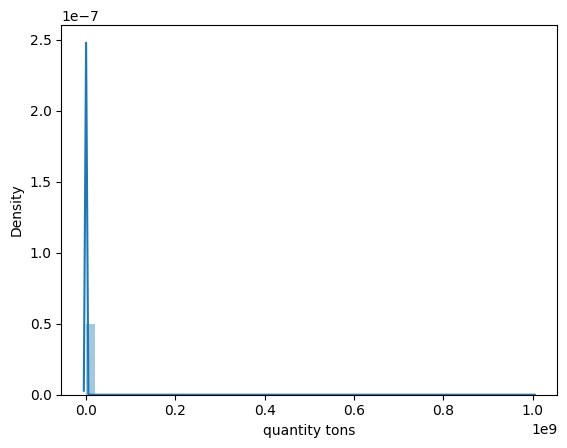

country
1.1771282028958299


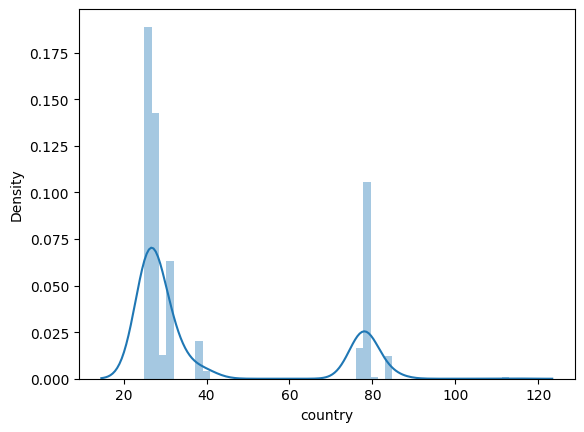

application
0.3631617467718338


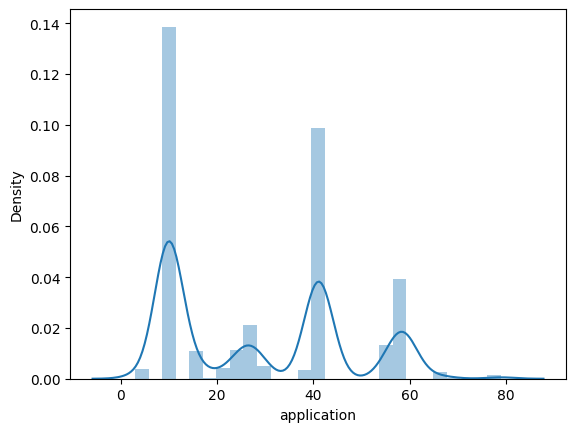

thickness
3.8230706651870876


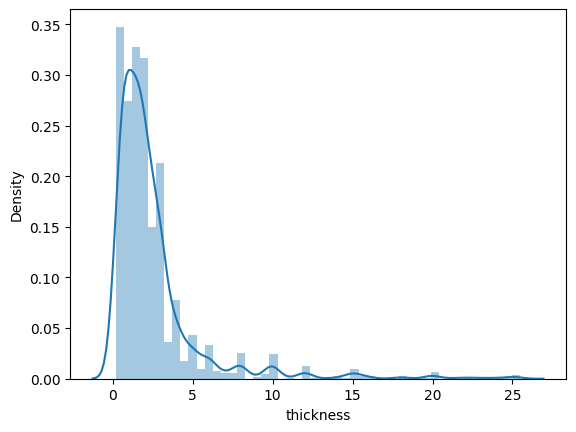

width
0.271738091739742


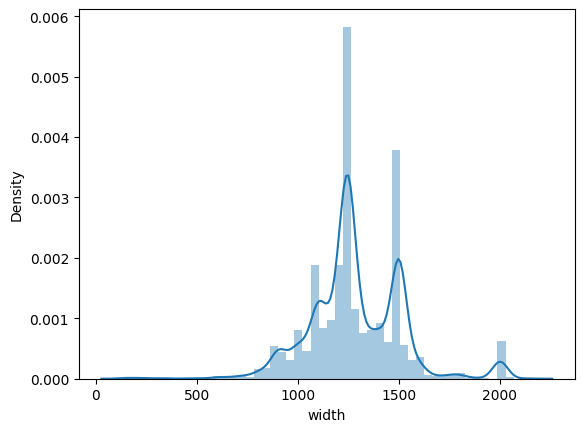

selling_price
0.016736996981361132


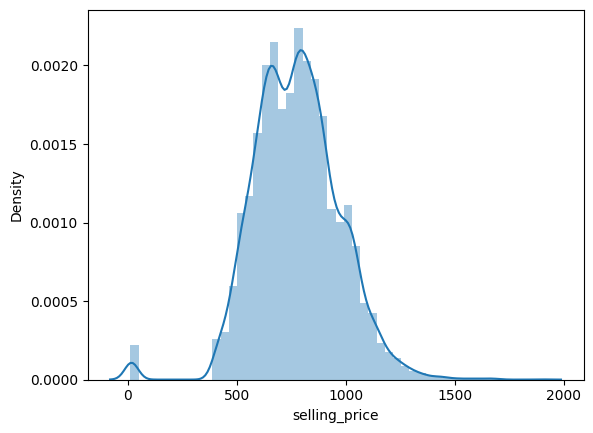

In [ ]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt


# df_plot["application"] -----> same as country
# df["quantity tons"] ----> high positively skewed
# df_plot["thickness"] ----> highly skewed than customer skew
# df_plot["width"] ----- > This value indicates a slight positive skew,
# df_plot["product_ref"] -------- > positively skewed
# df_plot["selling_price"] -----> highly positive skewed
# df_plot["country"]  ----> slightly positive skewed


for col in copper_num:
  if col not in ["delivery_date_year","delivery_date_month","delivery_date_day","item_date_year","item_date_month","item_date_day",'customer',"product_ref"]:
    print(col)
    print(skew(copper_num[col]))
    plt.figure()
    sns.distplot(copper_num[col])
    plt.show()


##**Correlation heat map before removing skewness**

> **No, the image you sent is not helpful to take all features to train a model. The image shows a graph of the relationship between quantity tons, country, application, thickness, and selling price. The graph does not show the relationship between all of the features in your dataset, which also includes customer and product_ref**.

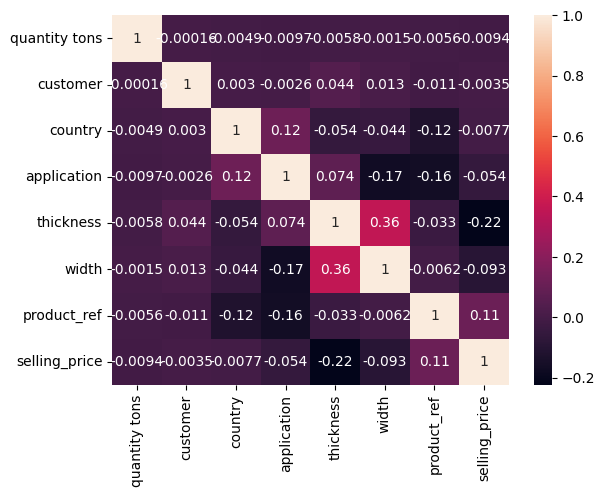

In [ ]:
sns.heatmap(copper_num.corr(),annot=True)
plt.show()

In [ ]:
import numpy as np
mask1 = df_plot['selling_price'] <= 0
print(mask1.sum())
df_plot.loc[mask1, 'selling_price'] = np.nan # just replace those negative values with Nan

mask1 = df_plot['quantity tons'] <= 0
print(mask1.sum())
df_plot.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_plot['thickness'] <= 0
print(mask1.sum())

0
1
0


In [ ]:
df_plot.isnull().sum()

quantity tons     1
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
material_ref      0
product_ref       0
selling_price     0
item_date_year    0
dtype: int64

In [ ]:
df_plot.dropna(inplace = True) # selling and quantity must be positive not negative

In [ ]:
df_plot.isnull().sum()

quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
material_ref      0
product_ref       0
selling_price     0
item_date_year    0
dtype: int64

##**Feature transformation**

2.4147331626381825


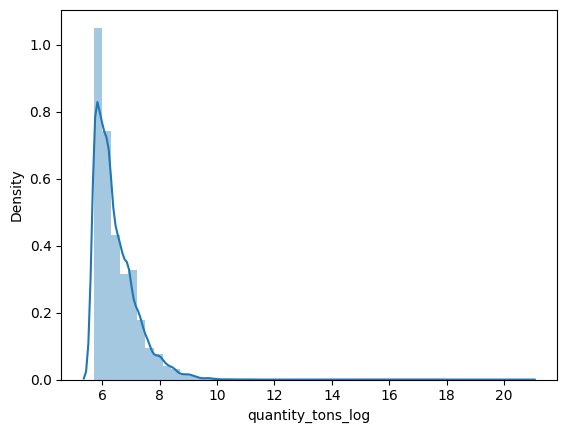

0.32486852025788004


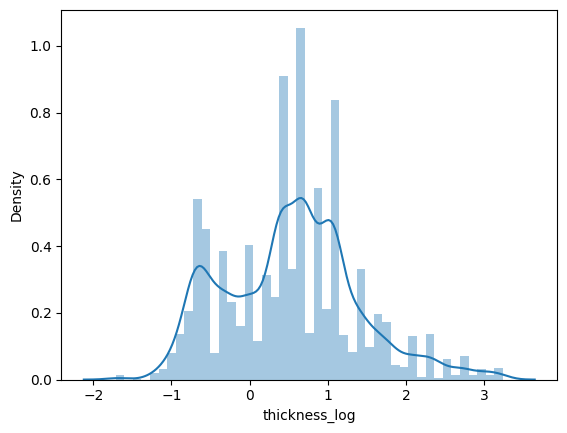

-6.15253124546579


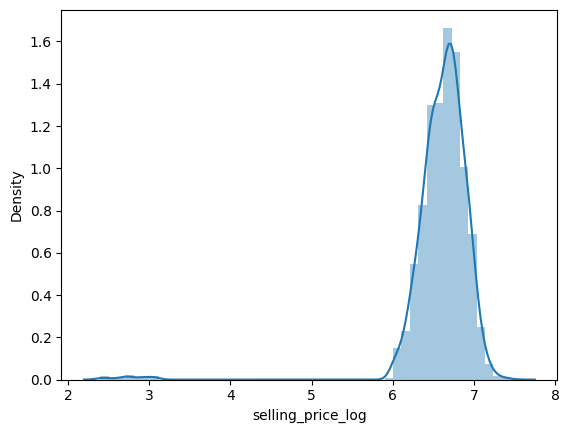

In [ ]:
df_plot["quantity_tons_log"] = np.log(df_plot["quantity tons"])
sns.distplot(df_plot["quantity_tons_log"])
print(skew(df_plot["quantity_tons_log"]))
plt.show()
df_plot["thickness_log"] = np.log(df_plot["thickness"])
sns.distplot(df_plot["thickness_log"])
print(skew(df_plot["thickness_log"]))
plt.show()
df_plot["selling_price_log"] = np.log(df_plot["selling_price"])
sns.distplot(df_plot["selling_price_log"])
print(skew(df_plot["selling_price_log"]))
plt.show()

In [ ]:
df_plot.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year,quantity_tons_log,thickness_log,selling_price_log
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,1047.00,2021,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,2021,5.956169,-0.967584,6.468211
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,2021,6.666354,1.386294,6.357842
9,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,unknown,1668701718,983.00,2021,6.446714,0.405465,6.890609
21,471.838180,30202938.0,25.0,Won,W,41.0,2.50,1275.0,unknown,1668701718,979.00,2021,6.156636,0.916291,6.886532


##**Feature selection**

In [ ]:
x = df_plot[["quantity_tons_log","application","thickness_log","width","selling_price_log","country","customer","product_ref"]].corr()

##**Correlation Heat map after removing skewness**
Feature engineering is the process of transforming raw data into features that are suitable for machine learning models

> **Yes, all features are suitable for training based features because The correlation matrix shows that all features have a positive correlation with the target variable, selling_price_log, with correlation coefficients ranging from 0.023 to 0.374. This suggests that all features are likely to be informative for predicting the target variable**.

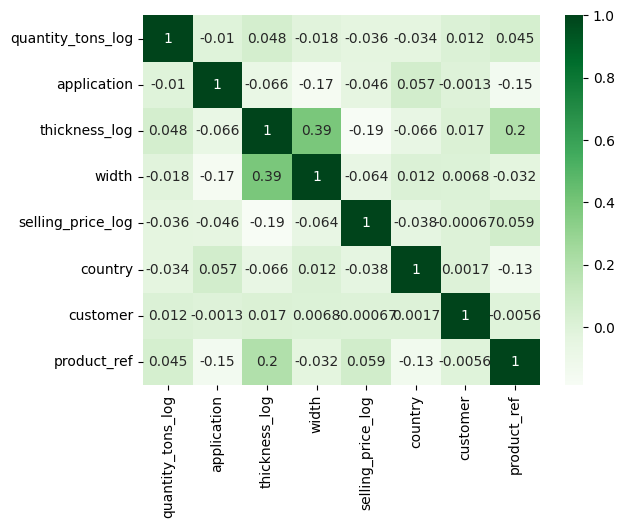

In [ ]:
sns.heatmap(x,annot=True,cmap="Greens")
plt.show()

In [ ]:
df_plot.drop(df_plot.index[df_plot["item_date_year"] == 1995],inplace=True)
df_plot.drop(df_plot.index[df_plot["item_date_year"] == 2019],inplace=True)

In [ ]:
print(df_plot["status"].unique())
print(df_plot["item type"].unique())
print(df_plot["application"].unique())
print(df_plot["country"].unique())
print(df_plot["product_ref"].unique())
print(df_plot["item_date_year"].value_counts())

['Won' 'Not lost for AM' 'To be approved' 'Lost' 'Wonderful' 'Draft'
 'Revised' 'Offered']
['W' 'WI' 'S' 'PL' 'Others' 'SLAWR']
[41. 28. 59. 10. 42. 56. 26. 15. 27.  4. 20. 29. 40. 25. 67. 79. 38. 22.
 66.  3.  5. 39. 69. 65. 58. 19. 70. 99.  2. 68.]
[ 25.  30.  32.  28.  78. 113.  77.  26.  39.  27.  80.  84.  38.  79.
  40.  44.  89. 107.]
[1668701718     628377     640665     611993 1670798778  164141591
 1668701376 1332077137 1671863738 1693867550     640405     640400
 1671876026     628112  164336407 1665572374     611728 1668701698
 1721130331     628117  164337175     611733 1722207579 1693867563
 1282007633 1668701725 1690738206 1665584642]
2020    22349
2021    14706
Name: item_date_year, dtype: int64


In [ ]:
print(int(df_plot["quantity tons"].min()) , df_plot["quantity tons"].max())
print(int(df_plot["thickness"].min()) , df_plot["thickness"].max())
print(int(df_plot["width"].min()) , df_plot["width"].max())
print(int(df_plot["customer"].min()) , df_plot["customer"].max())

85 1000000000.0
0 25.5
29 2150.0
30147620 2147483647.0


In [ ]:
X.shape

(30074, 10)

In [ ]:
X = df_plot.loc[:,['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
Y = df_plot.loc[:,["selling_price_log"]]

In [ ]:
df_plot.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
selling_price        0
item_date_year       0
quantity_tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [ ]:
X

,quantity_tons_log,status,item type,application,thickness_log,width,country,customer,product_ref
1,6.643822,Won,W,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718
2,5.956169,Won,WI,28.0,-0.967584,952.0,30.0,30153963.0,628377
3,5.310301,Won,S,59.0,0.832909,1317.0,32.0,30349574.0,1668701718
4,6.666354,Won,W,10.0,1.386294,2000.0,28.0,30211560.0,640665
5,5.419608,Won,W,41.0,0.405465,1265.0,25.0,30202938.0,1668701718
...,...,...,...,...,...,...,...,...,...
181664,6.402108,Won,W,41.0,-0.162519,1240.0,25.0,30200854.0,164141591
181667,4.670802,Won,W,41.0,-0.040822,1240.0,25.0,30200854.0,164141591
181668,4.629691,Won,W,41.0,-0.040822,1220.0,25.0,30200854.0,164141591
181669,5.337954,Won,W,41.0,-0.051293,1500.0,25.0,30200854.0,164141591


In [ ]:
Y

,selling_price_log
1,6.953684
2,6.468211
3,6.643790
4,6.357842
5,6.890609
...,...
181664,6.411818
181667,6.400257
181668,6.381816
181669,6.378426


In [ ]:
# df_plot["item_date_year"] = df["item_date_year"]

In [ ]:
# import pycaret
# from pycaret.regression import *
# exp_name = setup(data = X , target = df_plot["selling_price_log"])

In [ ]:
# compare_models()

##**RandomForestRegressor to predict selling_price**

**Same steps for Regression modelling.(note: dataset contains more noise
and linearity between independent variables so itll perform well only with
tree based models)**

In [ ]:
# RandomForestRegressor(n_jobs=-1, random_state=3926)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score

X = df_plot.loc[:,['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref',"item_date_year"]]
Y = df_plot.loc[:,["selling_price_log"]]
Ohe = OneHotEncoder(handle_unknown="ignore")
# encoding Categorical variables
item_ohe = Ohe.fit_transform(X[['item type']]).toarray()

Ohe1 = OneHotEncoder(handle_unknown="ignore")
status_ohe = Ohe1.fit_transform(X[["status"]]).toarray()

Ohe2 = OneHotEncoder(handle_unknown="ignore")
item_date_ohe = Ohe2.fit_transform(X[["item_date_year"]]).toarray()

X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, item_ohe, status_ohe, item_date_ohe), axis=1)
ss = StandardScaler()
ss.fit_transform(X)

#train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 1)

# RandomForestregressor
rfr = RandomForestRegressor(random_state=1)

kf = KFold(n_splits = 5)
# Define the parameter grid
hyper_params  = {
    'n_estimators': range(50, 301, 50), # No. of DTs in your Forest
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'mae']
}

# gridsearchcv
rcv = RandomizedSearchCV(estimator=rfr, param_distributions=hyper_params, cv=kf,random_state = 1)

rcv.fit(x_train,y_train)

print("Best hyper parameters: ",rcv.best_params_)


best_model = rcv.best_estimator_

y_pred = best_model.predict(x_test)

r2 = r2_score(y_test,y_pred)

print("R2-score: ",r2)

mse = mean_squared_error(y_test,y_pred)

print("mean-squared-error: ",mse)

Best hyper parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'squared_error'}
R2-score:  0.9540130439825683
mean-squared-error:  0.010751217281981881


In [ ]:
print(X[0].shape)
# Saving the model

import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(ss, f)
with open('item.pkl', 'wb') as f:
    pickle.dump(Ohe, f)
with open('status.pkl', 'wb') as f:
    pickle.dump(Ohe1, f)
with open('date.pkl', 'wb') as f:
    pickle.dump(Ohe2, f)

(23,)


In [ ]:
print(X[0].shape)

(23,)


In [ ]:
# print(X[0].shape)
# X[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, item_ohe, status_ohe, item_date_ohe), axis=1)
with open(r"model.pkl",'rb') as file:
    loaded_model = pickle.load(file)
with open(r'scaler.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

with open(r"item.pkl", 'rb') as f:
    item_loaded = pickle.load(f)

with open(r"status.pkl", 'rb') as f:
    status_loaded = pickle.load(f)
with open(r"date.pkl", 'rb') as f:
    date_loaded = pickle.load(f)

new_sample = np.array([[np.log(90), 10, np.log(20), 0, 28,30202938,1670798778,'PL','Won',"2021"]])
new_sample_item = item_loaded.transform(new_sample[:, [7]]).toarray()
new_sample_status = status_loaded.transform(new_sample[:, [8]]).toarray()
new_sample_date = date_loaded.transform(new_sample[:,[9]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6]], new_sample_item, new_sample_status , new_sample_date), axis=1)
# print(new_sample[0].shape)
new_sample1 = scaler_loaded.transform(new_sample)
new_pred = loaded_model.predict(new_sample1)
print('Predicted selling price:', float(np.exp(new_pred)))

Predicted selling price: 999.070542081669


In [ ]:
print(len(new_sample1[0]))

23


In [ ]:
# import os

# # Define model and encoder paths
# model_path = os.path.join("D:/", "model.pkl")
# scaler_path = os.path.join("D:", "scaler.pkl")
# item_encoder_path = os.path.join("D:", "item.pkl")
# status_encoder_path = os.path.join("D:", "status.pkl")
# date_encoder_path = os.path.join("D:", "date.pkl")

# try:
#     # Create directories if required
#     os.makedirs(os.path.dirname(model_path), exist_ok=True)
#     os.makedirs(os.path.dirname(scaler_path), exist_ok=True)
#     os.makedirs(os.path.dirname(item_encoder_path), exist_ok=True)
#     os.makedirs(os.path.dirname(status_encoder_path), exist_ok=True)
#     os.makedirs(os.path.dirname(date_encoder_path), exist_ok=True)

#     # Save objects using pickle
#     with open(model_path, 'wb') as file:
#         pickle.dump(best_model, file)

#     with open(scaler_path, 'wb') as f:
#         pickle.dump(ss, f)

#     with open(item_encoder_path, 'wb') as f:
#         pickle.dump(Ohe, f)

#     with open(status_encoder_path, 'wb') as f:
#         pickle.dump(Ohe1, f)

#     with open(date_encoder_path, 'wb') as f:
#         pickle.dump(Ohe2, f)

#     print(f"Model saved to: {model_path}")
#     print(f"Scaler saved to: {scaler_path}")
#     print(f"Item encoder saved to: {item_encoder_path}")
#     print(f"Status encoder saved to: {status_encoder_path}")
#     print(f"Date encoder saved to: {date_encoder_path}")
# except Exception as e:
#     print(f"Error saving models: {e}")


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("data.zip", "w", zipfile.ZIP_DEFLATED) as zip_file:
    zip_file.write("model.pkl")

In [ ]:
# !pip install pycaret

In [ ]:
# import pycaret

In [ ]:
print(df_plot.shape[0])
df_plot.head(3)


37055


,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date_year,quantity_tons_log,thickness_log,selling_price_log
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,1047.00,2021,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,2021,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,2021,5.310301,0.832909,6.643790


In [ ]:
df_class = df_plot[df_plot["status"].isin(["Won","Lost"])]
len(df_class)

30074

In [ ]:
df_class[df_class["status"] == "Won"].shape

(22754, 15)

In [ ]:
df_class[df_class["status"] == "Lost"].shape

(7320, 15)

In [ ]:
np.unique(df_class["status"], return_counts = True)

(array(['Lost', 'Won'], dtype=object), array([ 7320, 22754]))

In [ ]:
np.unique(df_class["status"], return_counts = True)[1]/np.unique(Y, return_counts = True)[1].sum()

array([0.24339961, 0.75660039])

In [ ]:
# !pip install imbalanced-learn

In [ ]:
X= df_class[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref',"item_date_year"]]
Y = df_class['status']

In [ ]:
df_class.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
selling_price        0
item_date_year       0
quantity_tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

##**DecisionTreeClassifier to predict status**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

X1= df_class[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref',"item_date_year"]]
Y1 = df_class['status']

Ohe1 = OneHotEncoder(handle_unknown="ignore")
# encoding Categorical variables
item_ohe = Ohe1.fit_transform(X[['item type']]).toarray()

Ohe2 = OneHotEncoder(handle_unknown="ignore")
item_date_ohe = Ohe2.fit_transform(X[["item_date_year"]]).toarray()

lb = LabelBinarizer()
Y1 = lb.fit_transform(Y)

X1 = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, item_ohe , item_date_ohe), axis=1)

ss = StandardScaler()
X1 = ss.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)


# RandomForestClassifier
# Define the class weights dictionary
# class_weights = {0: 3, 1: 1}  # Adjust weights based on your data imbalance
dtc = DecisionTreeClassifier(random_state=1)


dtc.fit(x_train, y_train)


y_pred = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.8947630922693267
Confusion Matrix:
[[1169  296]
 [ 337 4213]]


Confusion Matrix: 
[[1169  296]
 [ 337 4213]]
--------------------------------------------------------------------------------
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1465
           1       0.93      0.93      0.93      4550

    accuracy                           0.89      6015
   macro avg       0.86      0.86      0.86      6015
weighted avg       0.90      0.89      0.90      6015

--------------------------------------------------------------------------------
F1-score:  0.9301247378297826
--------------------------------------------------------------------------------


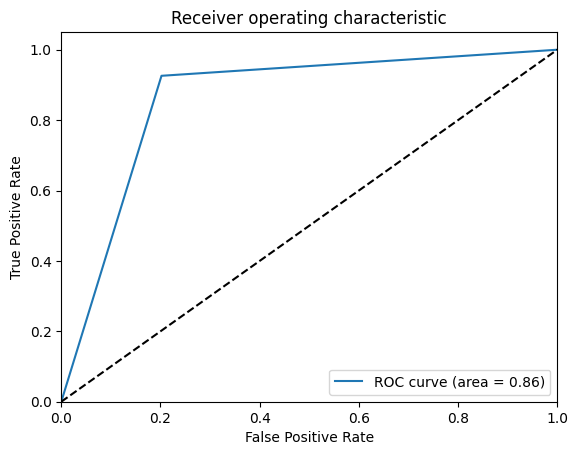

In [ ]:
# Evolution matrices
from sklearn.metrics import f1_score , confusion_matrix
from sklearn.metrics import classification_report , roc_curve , auc
import matplotlib.pyplot as plt
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))
print("-"*80)
print("Classification report: ")
print(classification_report(y_test,y_pred))
print("-"*80)
print("F1-score: ",f1_score(y_test,y_pred))
print("-"*80)
# ROC curve and AUC
fpr, tpr , thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(2000000), np.log(10), 10.0, np.log(1.0),150.0,79.0,30223404.0,1668701718,'W',"2021"]])
new_item_ohe = Ohe1.transform(new_sample[:, [8]]).toarray()
new_date_ohe = Ohe2.transform(new_sample[:,[9]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_item_ohe,new_date_ohe), axis=1)
new_sample = ss.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
